## Data Initialization:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import power_transform, StandardScaler, MinMaxScaler, RobustScaler

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SiddantaK/Data-Acquisition-Management/main/M10_Data.csv")
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9', '111', '5000', '21', '27', '13495'],
      dtype='object')

In [5]:
renameColumn =  {'3':'symboling', '?':'normalized-losses','alfa-romero':'make','gas':'fuel-type','std':'aspiration',
                'two':'num-of-doors','convertible':'body-style','rwd':'drive-wheels','front':'engine-location',
                '88.6':'wheel-base','168.8':'length','64.1':'width','48.8':'height','2548':'curb-weight','dohc':'engine-type',
                 'four':'num-of-cylinders','130':'engine-size','mpfi':'fuel-system','3.47':'bore','2.68':'stroke',
                 '9':'compression-ratio','111':'horsepower','5000':'peak-rpm','21':'city-mpg','27':'highway-mpg',
                 '13495':'price'
                }
df.rename(columns = renameColumn, inplace = True)
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [8]:
df['normalized-losses'].unique() #checking unique values for normalized-losses

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

#### Results: For the normalized losses, since it contains invalid value '?', imputation should be performed in this.

In [9]:
df['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

In [10]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [11]:
price = df[df['price']=='?']['price']
price

8      ?
43     ?
44     ?
128    ?
Name: price, dtype: object

In [12]:
df['num-of-doors'].unique() #categorical

array(['two', 'four', '?'], dtype=object)

In [13]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [14]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [15]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

### Since we have seen most of the column contains invalid value '?', its existence is checked every column. If the following sum is equal to the total number of rows(204, then it does not contain '?', otherwise it contains '?'.

#### We can see that normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, and price contains invalid value. 

In [61]:
invalid = df[df=='?']
invalid.isnull().sum()
invalid

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis (EDA) 

### Step 1: Run descriptive statistics for each attribute ####

####  The numeric variables are included in this dataset except for the categorical one. Although normalized-losses, bore, stroke, horsepower, peak-rpm, and price are also numeric variables, it contains invalid value, therefore it is taken as an object by the describe function.

In [17]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### To include other remaining numerical variables, invalid data should firstly be replaced by the null value

In [18]:
pd.set_option('display.max_columns', None)
df[df=='?'] = np.nan
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Converting the data type object to numerical one.

In [19]:
df['normalized-losses']= pd.to_numeric(df['normalized-losses'],errors='ignore' )
df['bore'] = pd.to_numeric(df['bore'] )
df['stroke'] = pd.to_numeric(df['stroke'] )
df['horsepower'] = pd.to_numeric(df['horsepower'] )
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'] )
df['price'] = pd.to_numeric(df['price'],errors='coerce')


### Here a data of newly converted columns 

In [20]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,164.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,200.000000,200.000000,204.000000,202.000000,202.000000,204.000000,204.000000,200.000000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329050,3.258300,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.690000
std,1.239035,35.442168,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.274044,0.314868,3.981000,39.810182,480.443680,6.551513,6.898337,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,150.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Now we can deal with missing datas

In [21]:
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Results: After conversion of the invalid data into the null datam, it's more flexible to deal with null values. The columns containing null values are normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, and price. Among them normalized-losses contains maximum number of missing data.

## Univariate Analysis

<AxesSubplot:xlabel='normalized-losses'>

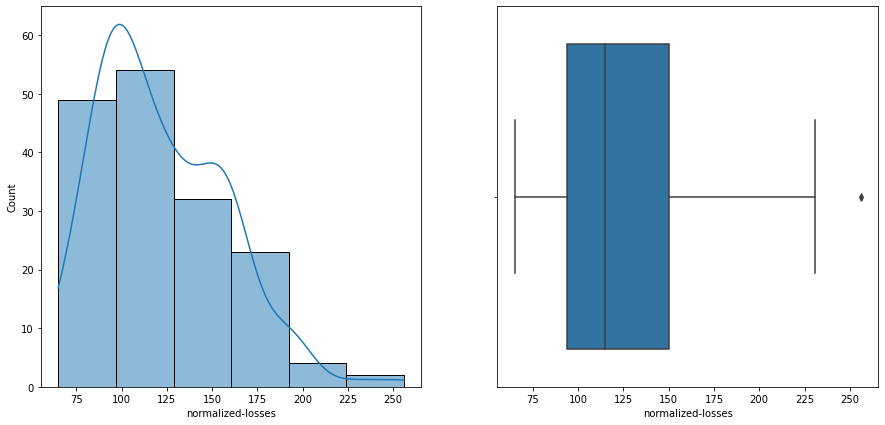

In [22]:
# Creating plot
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.histplot(df['normalized-losses'], kde=True, bins=6,thresh=None,ax= axes[0])
sns.boxplot(data=df, x="normalized-losses",ax=axes[1])

#### Conclusion: As we can see outliers in normalized-losses, its better to replace the missing values with the median than mean; since, outliers affects more on mean.

In [23]:
med = df['normalized-losses'].median()
df['normalized-losses'].replace(np.nan, med, inplace = True)

<AxesSubplot:xlabel='normalized-losses'>

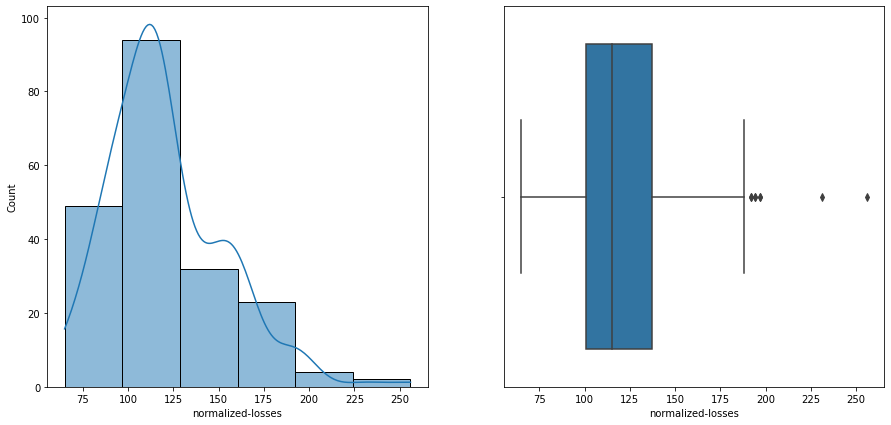

In [24]:
# Creating plot
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.histplot(df['normalized-losses'], kde=True, bins=6,thresh=None,ax= axes[0])
sns.boxplot(data=df, x="normalized-losses",ax=axes[1])

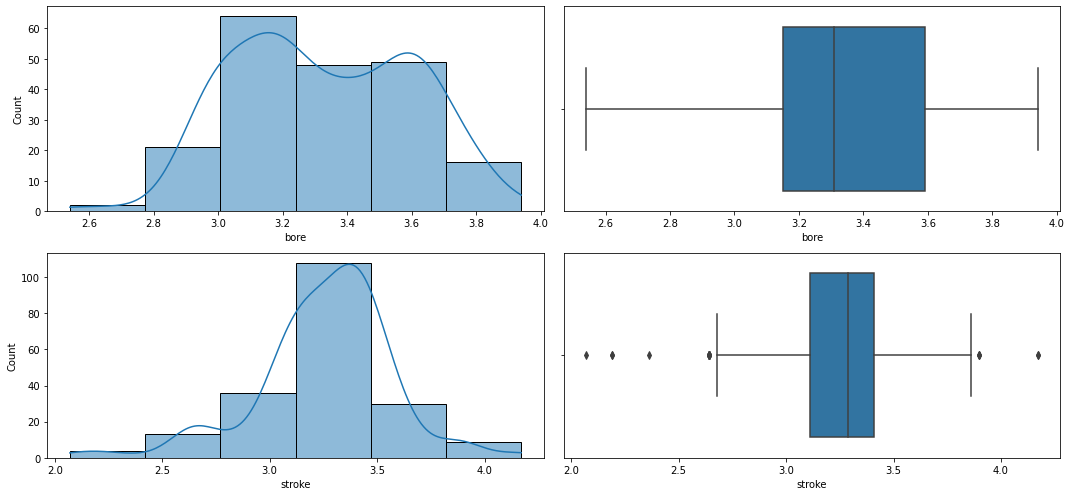

In [25]:
fig, axes = plt.subplots(2,2,figsize=(15,7))
sns.histplot(df['bore'], kde=True, thresh=None,bins=6,ax= axes[0][0])
sns.boxplot(data=df, x="bore",ax=axes[0][1])

sns.histplot(df['stroke'], kde=True, thresh=None,bins=6,ax= axes[1][0])
sns.boxplot(data=df, x="stroke",ax=axes[1][1])

fig.tight_layout()
plt.show()

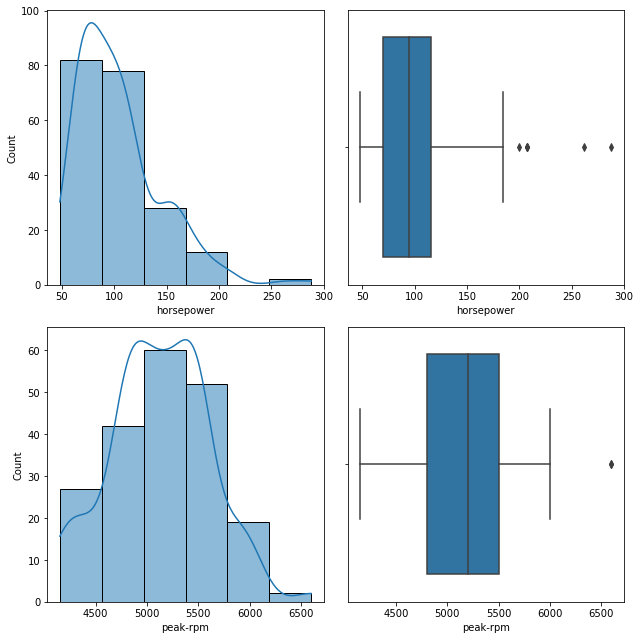

In [26]:
fig, axes = plt.subplots(2,2,figsize=(9,9))
sns.histplot(df['horsepower'], kde=True, thresh=None,bins=6,ax= axes[0][0])
sns.boxplot(data=df, x="horsepower",ax=axes[0][1])

sns.histplot(df['peak-rpm'], kde=True, thresh=None,bins=6,ax= axes[1][0])
sns.boxplot(data=df, x="peak-rpm",ax=axes[1][1])

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='price'>

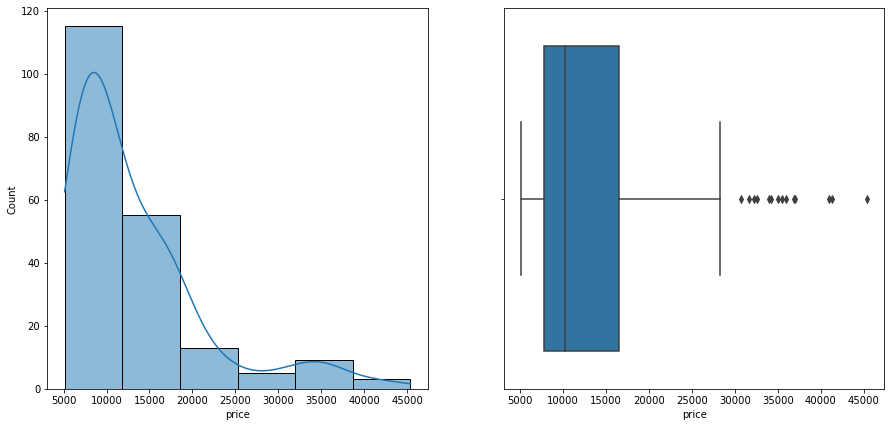

In [27]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.histplot(df['price'], kde=True, thresh=None,bins=6,ax= axes[0])
sns.boxplot(data=df, x="price",ax=axes[1])

<AxesSubplot:xlabel='symboling'>

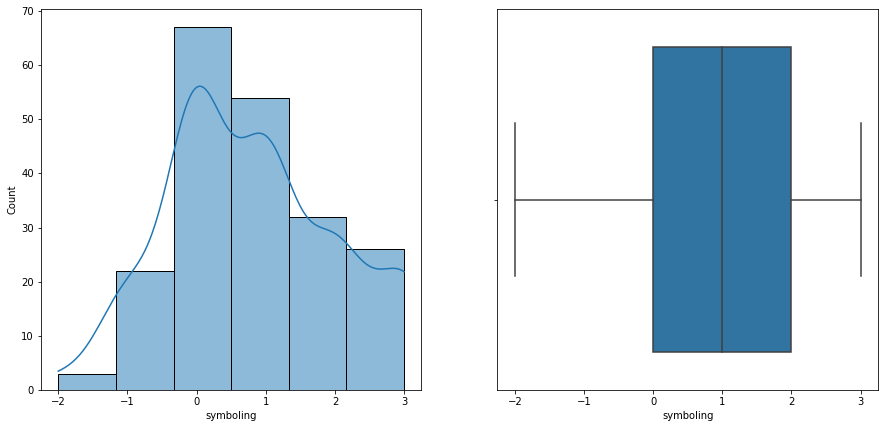

In [28]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.histplot(df['symboling'], kde=True, thresh=None,bins=6,ax= axes[0])
sns.boxplot(data=df, x="symboling",ax=axes[1])

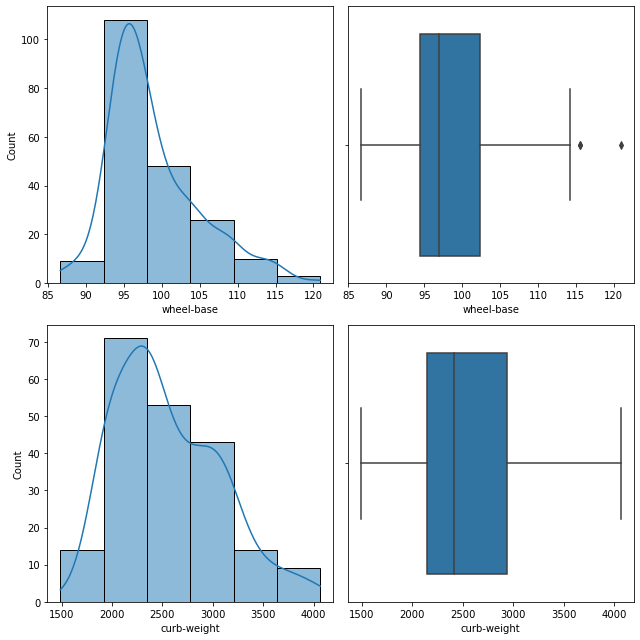

In [29]:
fig, axes = plt.subplots(2,2,figsize=(9,9))
sns.histplot(df['wheel-base'], kde=True, thresh=None,bins=6,ax= axes[0][0])
sns.boxplot(data=df, x="wheel-base",ax=axes[0][1])

sns.histplot(df['curb-weight'], kde=True, thresh=None,bins=6,ax= axes[1][0])
sns.boxplot(data=df, x="curb-weight",ax=axes[1][1])

fig.tight_layout()
plt.show()

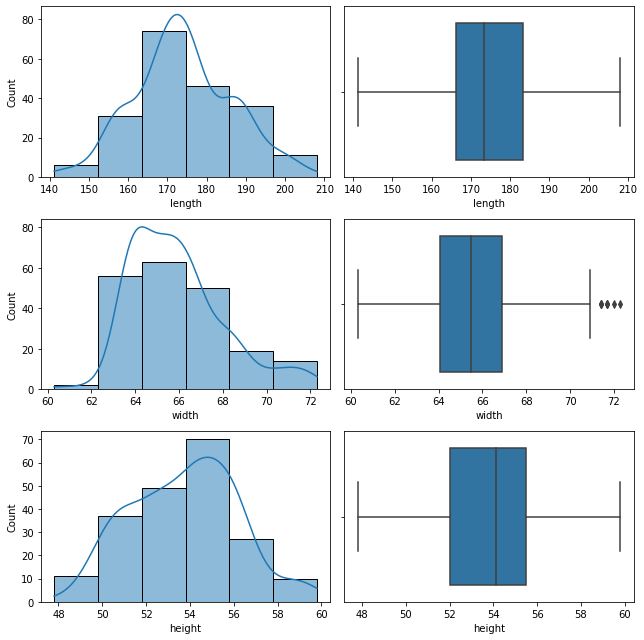

In [30]:
fig, axes = plt.subplots(3,2,figsize=(9,9))
sns.histplot(df['length'], kde=True, thresh=None,bins=6,ax= axes[0][0])
sns.boxplot(data=df, x="length",ax=axes[0][1])

sns.histplot(df['width'], kde=True, thresh=None,bins=6,ax= axes[1][0])
sns.boxplot(data=df, x="width",ax=axes[1][1])

sns.histplot(df['height'], kde=True, thresh=None,bins=6,ax= axes[2][0])
sns.boxplot(data=df, x="height",ax=axes[2][1])

fig.tight_layout()
plt.show()

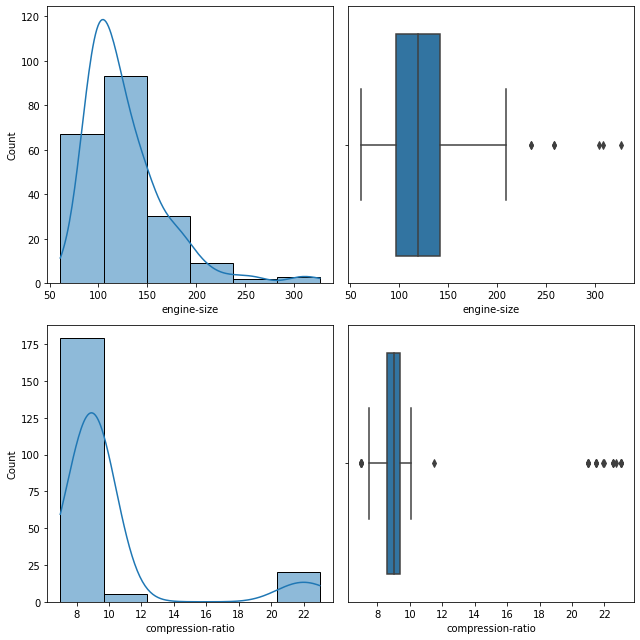

In [31]:
fig, axes = plt.subplots(2,2,figsize=(9,9))
sns.histplot(df['engine-size'], kde=True, thresh=None,bins=6,ax= axes[0][0])
sns.boxplot(data=df, x="engine-size",ax=axes[0][1])

sns.histplot(df['compression-ratio'], kde=True, thresh=None,bins=6,ax= axes[1][0])
sns.boxplot(data=df, x="compression-ratio",ax=axes[1][1])

fig.tight_layout()
plt.show()

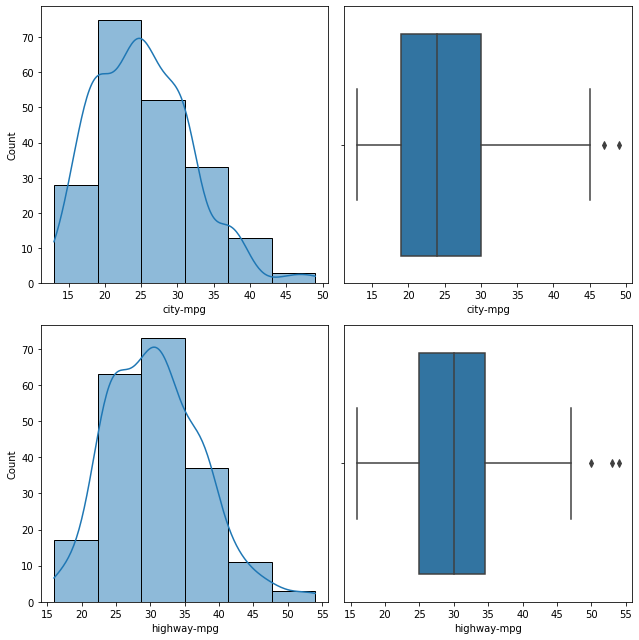

In [32]:
fig, axes = plt.subplots(2,2,figsize=(9,9))
sns.histplot(df['city-mpg'], kde=True, thresh=None,bins=6,ax= axes[0][0])
sns.boxplot(data=df, x="city-mpg",ax=axes[0][1])

sns.histplot(df['highway-mpg'], kde=True, thresh=None,bins=6,ax= axes[1][0])
sns.boxplot(data=df, x="highway-mpg",ax=axes[1][1])

fig.tight_layout()
plt.show()

### Categorical Data

<AxesSubplot:title={'center':'Numer of Vehicles by make'}>

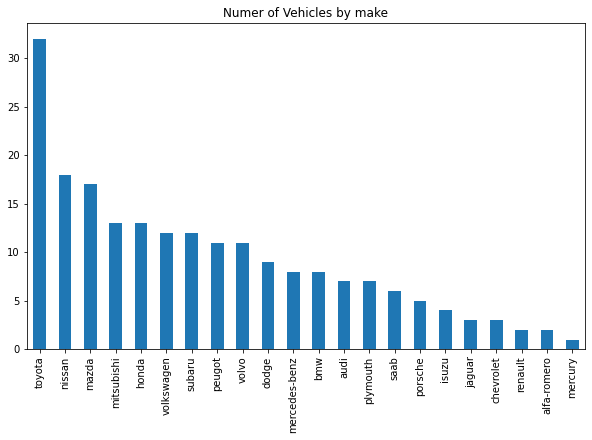

In [33]:
plt.figure(figsize=(10, 6))
df['make'].value_counts().plot.bar(title = "Numer of Vehicles by make") #categorical

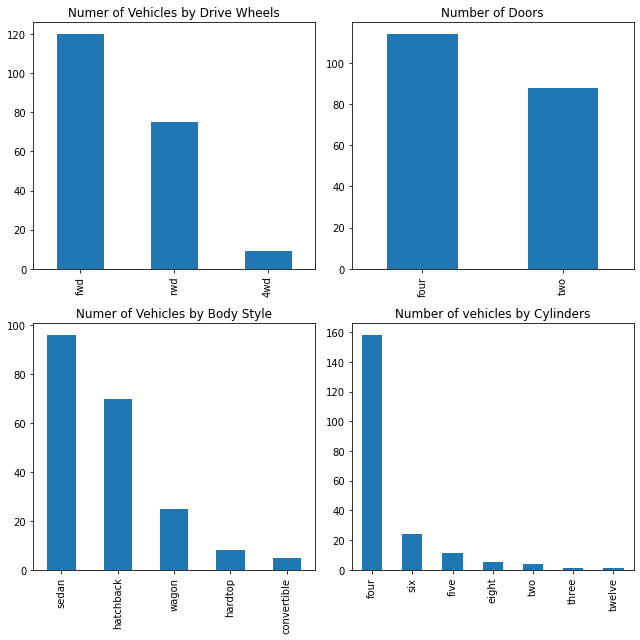

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=2, figsize=(9, 9))

df['drive-wheels'].value_counts().plot.bar(ax=ax1[0],title = "Numer of Vehicles by Drive Wheels") #categorical

df['num-of-doors'].value_counts().plot.bar(ax=ax1[1],title = "Number of Doors") #categorical


df['body-style'].value_counts().plot.bar(ax=ax2[0],title = "Numer of Vehicles by Body Style") #categorical

df['num-of-cylinders'].value_counts().plot.bar(title = "Number of vehicles by Cylinders") #categocial

fig.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Numer of Vehicles by Fuel System'}>

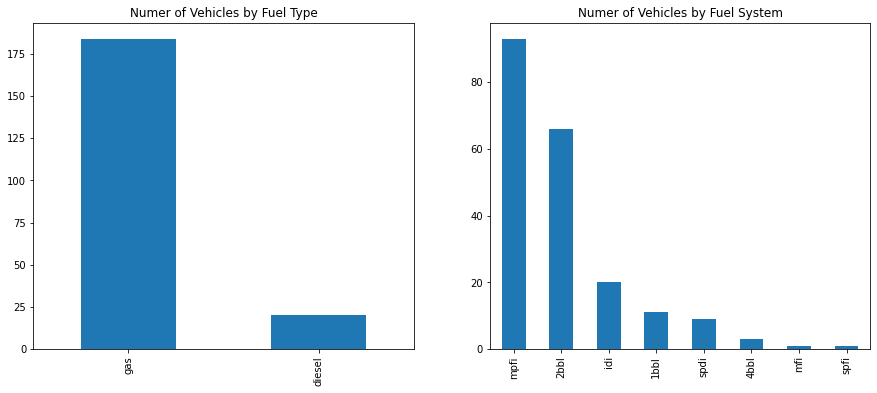

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15, 6))
df['fuel-type'].value_counts().plot.bar(ax=ax1,title = "Numer of Vehicles by Fuel Type") #categorical
df['fuel-system'].value_counts().plot.bar(ax=ax2, title = "Numer of Vehicles by Fuel System") #categorica;

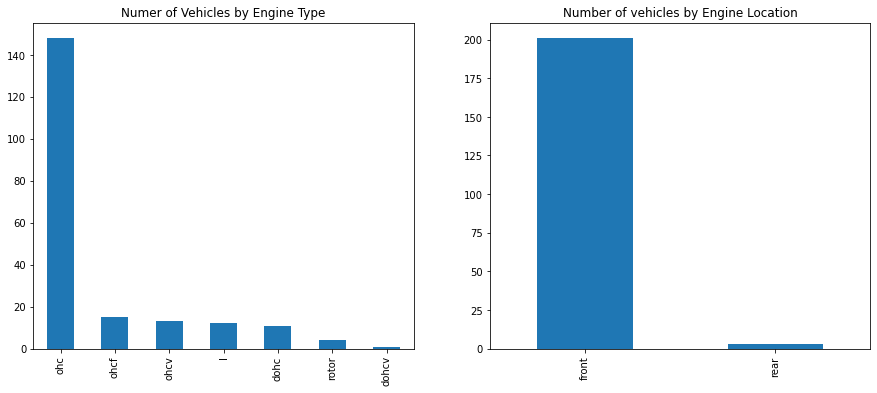

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15, 6))
df['engine-type'].value_counts().plot.bar(ax=ax1, title = "Numer of Vehicles by Engine Type") #categorical
df['engine-location'].value_counts().plot.bar(ax=ax2,title = "Number of vehicles by Engine Location") #categorical
plt.show()

<AxesSubplot:>

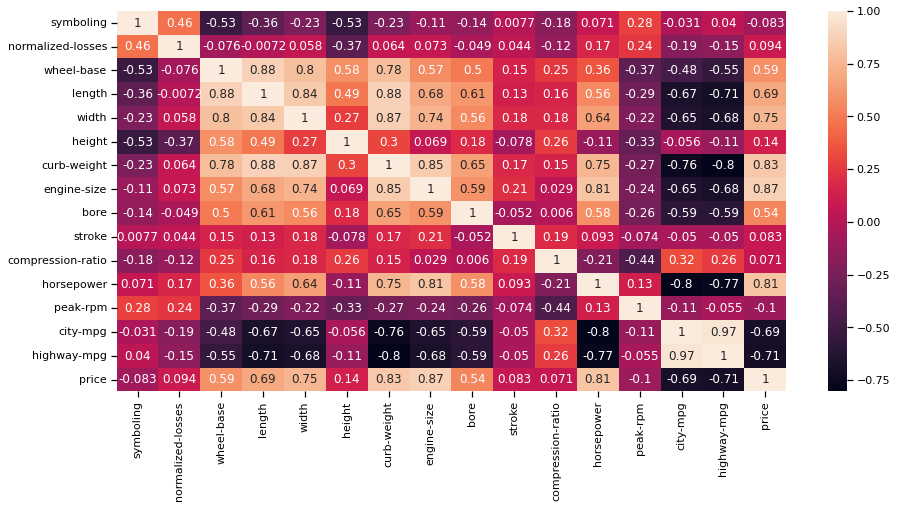

In [37]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True)

### Findings


<li>1. Symboling and Normalized losses are correlated compare to others.</li>
<li>2. Wheels base correlated with length, width, and curb-weight </li>
<li>3. Price More correlated with engine size and curb-weight than others </li>

## Bivariate Analysis

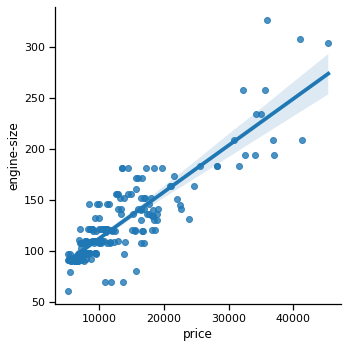

In [38]:
sns.lmplot(x = 'price', y = 'engine-size',data = df);

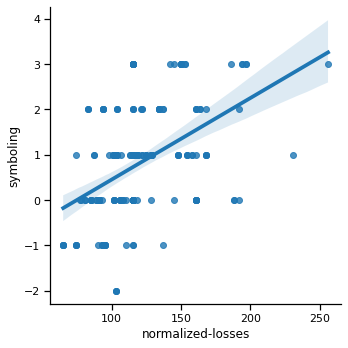

In [39]:
sns.lmplot(x = 'normalized-losses', y = 'symboling',data = df);

## 3) Data Preparation & Feature Engineering

### 2. Consider the number-of-doors and price variables

In [40]:
print("There are",df['num-of-doors'].isnull().sum(),'missing data for number of doors')
print("There are",df['price'].isnull().sum(),'missing data for price')

There are 2 missing data for number of doors
There are 4 missing data for price


### Since there are very few missing data for the price and number of doors which is less than 2%, replacing the missing data with mean or median for price and mode for number of doors

In [41]:
doorMode = df['num-of-doors'].mode()[0]
print(doorMode)
df['num-of-doors'] = df['num-of-doors'].replace(np.nan,doorMode,inplace=False) 
df['price'].replace(np.nan,df['price'].median(),inplace=True)
print(df['num-of-doors'].isnull().sum())

four
0


<AxesSubplot:xlabel='price'>

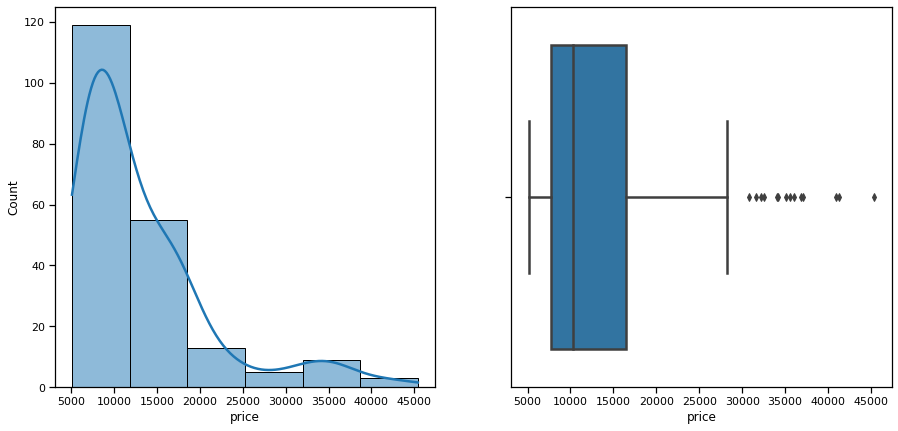

In [42]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.histplot(df['price'], kde=True, thresh=None,bins=6,ax= axes[0])
sns.boxplot(data=df, x="price",ax=axes[1])

<AxesSubplot:title={'center':'Number of Doors'}>

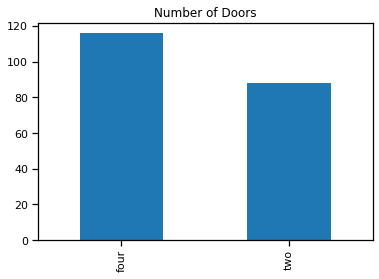

In [43]:
df['num-of-doors'].value_counts().plot.bar(title = "Number of Doors")

### 3. Consider the engine-size and stroke variables

#### Before implementing of scaling methods, checking of outliers is necessary.

<AxesSubplot:xlabel='engine-size'>

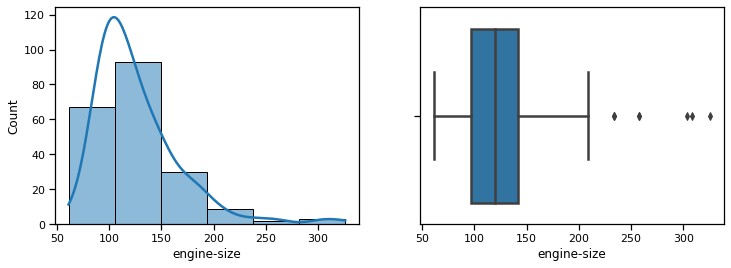

In [44]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(df['engine-size'], kde=True, thresh=None,bins=6,ax= axes[0])
sns.boxplot(data=df, x="engine-size",ax=axes[1])

<AxesSubplot:xlabel='stroke'>

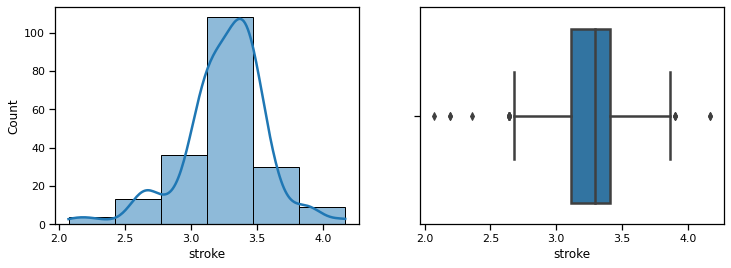

In [45]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(df['stroke'], kde=True, thresh=None,bins=6,ax= axes[0])
sns.boxplot(data=df, x="stroke",ax=axes[1])

### Both of the variable shows a non-normal distribution therefore standardization should not be used.

In [46]:
engSize = df['engine-size'].to_numpy()
scaler = MinMaxScaler()
engTrans = scaler.fit_transform(engSize.reshape(-1,1))

#### MinMaxScaler  rescales the range of features to scale the range in 0 to 1.

In [47]:
df['engine-size'] = engTrans.flatten()
df.describe()['engine-size']

count    204.000000
mean       0.248650
std        0.157527
min        0.000000
25%        0.135849
50%        0.220755
75%        0.305660
max        1.000000
Name: engine-size, dtype: float64

#### Replotting after scaling

<AxesSubplot:xlabel='engine-size'>

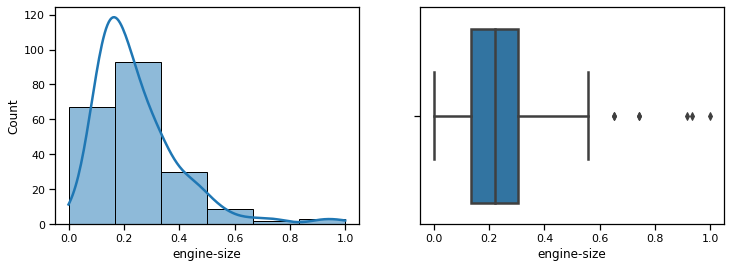

In [48]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(df['engine-size'], kde=True, thresh=None,bins=6,ax= axes[0])
sns.boxplot(data=df, x="engine-size",ax=axes[1])

#### Conclusion: The use of MinMaxScaler have preserved the shape of original distribution. It was selected for this variable because of the variable shows non-normal distribution. However, this scaler don't seem to reduced the importance of the outliers.

#### Since MinMaxScaler don't work on outliers, Robust Scaler is used for the stroke variable. Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [49]:
stroke = df['stroke'].to_numpy()
scaler = RobustScaler()
strokeTrans = scaler.fit_transform(stroke.reshape(-1,1))

In [50]:
df['stroke'] = strokeTrans.flatten()
df.describe()['stroke']

count    200.000000
mean      -0.105667
std        1.049560
min       -4.066667
25%       -0.600000
50%        0.000000
75%        0.400000
max        2.933333
Name: stroke, dtype: float64

<AxesSubplot:xlabel='stroke'>

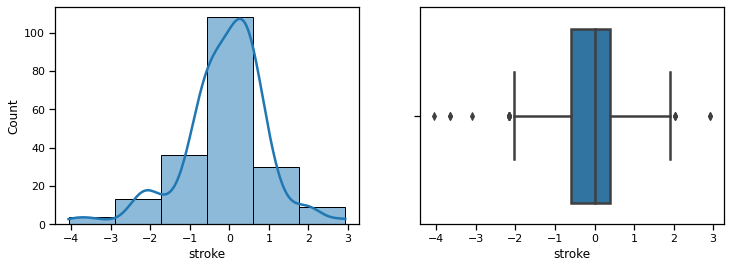

In [51]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(df['stroke'], kde=True, thresh=None,bins=6,ax= axes[0])
sns.boxplot(data=df, x="stroke",ax=axes[1])

#### Robust Scalar does not seem to be effective for this case because there is not any improvement in the outliers.

## 4. Consider the symboling, make, and engine-type variables

symboling: It is ordinal/categorical. Distribution from -3 to +3, +3 is risky, -3 is safe

make: It is nominal/Categorical data. Vehicle brands

engine-type: It is nominal/Categorical data. Engine type.

### 4.2/4.3

Pandas provides one-hot encoding function pandas.get_dummies for categorical data, we can use this function to encode three categorical variables

In [52]:
Symboling = pd.get_dummies(df['symboling'],prefix="sym")
Symboling

,sym_-2,sym_-1,sym_0,sym_1,sym_2,sym_3
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
199,0,1,0,0,0,0
200,0,1,0,0,0,0
201,0,1,0,0,0,0
202,0,1,0,0,0,0


In [53]:
Make = pd.get_dummies(df['make'],prefix="make")
Make

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
Engine_type = pd.get_dummies(df['engine-type'],prefix="ET")
Engine_type

,ET_dohc,ET_dohcv,ET_l,ET_ohc,ET_ohcf,ET_ohcv,ET_rotor
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
199,0,0,0,1,0,0,0
200,0,0,0,1,0,0,0
201,0,0,0,0,0,1,0
202,0,0,0,1,0,0,0


## 5

Principal component analysis (PCA) is an unsupervised algorithm that creates linear combinations of the original features. The new features are orthogonal, which means that they are uncorrelated. Furthermore, they are ranked in order of their “explained variance.” The first principal component (PC1) explains the most variance in your dataset, PC2 explains the second-most variance, and so on.(https://elitedatascience.com/dimensionality-reduction-algorithms)  

First we should normalize our dataset. Get specified columns and sum the NAN values

In [62]:
AGM = df[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm','city-mpg']]
AGM

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,0.260377,9.0,111.0,5000.0,21
1,94.5,171.2,65.5,52.4,2823,0.343396,9.0,154.0,5000.0,19
2,99.8,176.6,66.2,54.3,2337,0.181132,10.0,102.0,5500.0,24
3,99.4,176.6,66.4,54.3,2824,0.283019,8.0,115.0,5500.0,18
4,99.8,177.3,66.3,53.1,2507,0.283019,8.5,110.0,5500.0,19
...,...,...,...,...,...,...,...,...,...,...
199,109.1,188.8,68.9,55.5,2952,0.301887,9.5,114.0,5400.0,23
200,109.1,188.8,68.8,55.5,3049,0.301887,8.7,160.0,5300.0,19
201,109.1,188.8,68.9,55.5,3012,0.422642,8.8,134.0,5500.0,18
202,109.1,188.8,68.9,55.5,3217,0.316981,23.0,106.0,4800.0,26


In [56]:
AGM.isna().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
dtype: int64

We can see peak-rpm and horsepower have NAN values

In [63]:
AGM[AGM.isin(np.nan)]

TypeError: only list-like or dict-like objects are allowed to be passed to DataFrame.isin(), you passed a 'float'

Remove these two items

In [58]:
AGM = AGM.drop([129, 130])

In [195]:
AGM[AGM.isna().T.any()]

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg


normalize AGM

In [196]:
sc = StandardScaler()
AGM_sc = sc.fit_transform(AGM)

In [197]:
AGM_sc

array([[-1.70471389, -0.42202893, -0.84161972, ...,  0.1706615 ,
        -0.2628885 , -0.64936762],
       [-0.72184997, -0.22816913, -0.19078555, ...,  1.25347072,
        -0.2628885 , -0.95406508],
       [ 0.16106169,  0.20801539,  0.13463154, ..., -0.05597298,
         0.78040182, -0.19232142],
       ...,
       [ 1.71032178,  1.19346933,  1.38981173, ...,  0.74983853,
         0.78040182, -1.10641382],
       [ 1.71032178,  1.19346933,  1.38981173, ...,  0.04475345,
        -0.68020463,  0.11237605],
       [ 1.71032178,  1.19346933,  1.38981173, ...,  0.24620633,
         0.57174375, -0.95406508]])

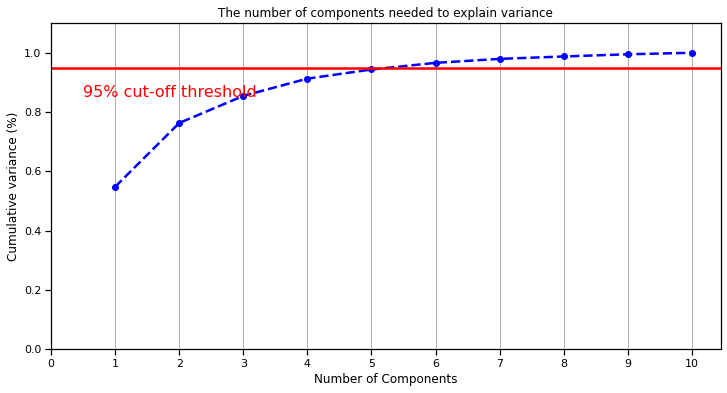

In [198]:
# cpoy from https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/, author:Bartosz Mikulski
# by use these codes, we can find if we want to get 95% of variance explained, we need 5 principal components.
pca = PCA().fit(AGM_sc)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [199]:
from sklearn.decomposition import PCA

Set the dimension to 5, and then use PCA transformation on the standardized AGM.

In [135]:
pca = PCA(n_components = 5)
AGM_pca = pca.fit_transform(AGM_sc)

(202, 5)

In [200]:
AGM_pca

array([[-1.12461226, -1.67606145,  1.61512651, -0.62092117, -0.10425632],
       [ 0.65221242, -1.3494449 ,  0.83765685, -0.51438178,  0.73225882],
       [-0.14874174, -0.20650131, -0.73489584,  0.61330421, -0.19287324],
       ...,
       [ 3.0115914 , -0.46192195, -1.02189699,  0.55475003, -0.32417372],
       [ 2.64329249,  2.76768185,  1.02044033,  1.87146182, -0.21876731],
       [ 2.59296898,  0.06361181, -1.17711425,  0.61680062, -0.75872251]])